### Here we will apply some simulations:
- fake users
- user likes
- user logs: watch time (60 - watch time = 10 T=30), favorite, click on content,

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from csaps import csaps
import matplotlib.pyplot as plt

### Fake users

In [11]:
df_fake_users = pd.read_csv('../data/fake_users.csv')
df_fake_users = df_fake_users[['user_id', 'username', 'gender']]

In [96]:
df_fake_users.iloc[0] = [0, 'koray', 'male']
df_fake_users.iloc[1] = [1, 'maryam', 'female']

In [98]:
df_fake_users.to_csv('../data/fake_users.csv', index=False)

In [12]:
pd.read_csv('../data/fake_users.csv').head(10)

,user_id,username,gender
0,0,koray,male
1,1,maryam,female
2,2,Roolearm,female
3,3,Alich1952,female
4,4,Evisold,male
5,5,Amor2010,female
6,6,Gert1963,female
7,7,Frorcut,female
8,8,Ablee2016,male
9,9,Notiontery71,female


#### User likes

In [13]:
df_tv_programs = pd.read_csv('../data/tv_programs_and_episodes.csv')

In [15]:
df_tv_programs_ids = df_tv_programs[df_tv_programs.is_season == 0]['tv_program_id']
df_tv_programs_ids[:10]

0     0
2     1
4     2
7     3
9     4
11    5
17    6
20    7
22    8
24    9
Name: tv_program_id, dtype: int64

In [18]:
df_fake_users = pd.read_csv('../data/fake_users.csv')['user_id']

In [19]:
df_user_likes = pd.DataFrame(index=df_fake_users.values, columns=df_tv_programs_ids.values)

In [20]:
%%time

width = len(df_user_likes.columns)
for idx in range(len(df_user_likes)):
    df_user_likes.iloc[idx, ] = np.random.randint(0, 2,size=width)

CPU times: user 277 ms, sys: 7.44 ms, total: 284 ms
Wall time: 285 ms


In [21]:
# row=user id, column=tv program id
df_user_likes[:10]

,0,1,2,3,4,5,6,7,8,9,...,2719,2726,2728,2740,2744,2749,2754,2765,2770,2773
0,1,1,0,0,0,1,0,1,0,0,...,0,1,1,0,1,0,1,0,1,0
1,0,0,1,1,0,1,1,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,0,0,0,1,0,0,1,0,0,0,...,0,1,0,1,1,0,1,0,0,1
3,1,1,0,0,0,1,1,1,0,0,...,1,0,1,0,1,0,0,1,1,0
4,1,1,0,0,1,0,1,1,0,0,...,0,1,0,1,1,0,0,0,0,1
5,0,1,1,0,0,1,0,1,0,1,...,0,1,1,1,1,1,0,0,1,0
6,1,1,0,1,0,1,1,1,0,0,...,1,0,1,1,1,1,1,1,1,0
7,0,0,0,0,1,1,0,1,1,0,...,1,1,0,0,1,1,1,1,1,0
8,0,0,0,0,1,0,1,1,1,0,...,1,0,1,0,1,1,0,1,1,0
9,0,0,0,0,1,1,0,1,0,1,...,1,1,0,0,0,1,0,1,0,1


In [22]:
# get liked tv programs of user_id=0
user_id = 0
tv_programs = df_user_likes.loc[user_id, df_user_likes.iloc[user_id] == 1].index

In [23]:
df_tv_programs[df_tv_programs.tv_program_id.isin(tv_programs)]

,tv_program_id,title,rating,description,is_season,season,episode_id,category,image_url,file_path
0,0,Proof,NaN,"Award-winning journalist, Guyon Espiner, inves...",0,-1,-1,"['documentary', 'local']",https://play-images-prod-ctf.tech.tvnz.co.nz/a...,documentary/proof.html
1,0,Proof,ML,Award-winning journalist Guyon Espiner looks i...,1,1,1,"['documentary', 'local']","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQEASAB...",NaN
2,1,The Little Master,NaN,"For two decades, International Cricket star Sa...",0,-1,-1,"['documentary', 'sport']",https://play-images-prod-ctf.tech.tvnz.co.nz/a...,documentary/the-little-master.html
3,1,The Little Master,G,"For two decades, International Cricket star Sa...",1,1,1,"['documentary', 'sport']","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",NaN
11,5,The Mating Game,NaN,Join some extraordinary creatures on the ultim...,0,-1,-1,"['documentary', 'full-seasons', 'natural-world']",https://play-images-prod-ctf.tech.tvnz.co.nz/a...,documentary/the-mating-game.html
...,...,...,...,...,...,...,...,...,...,...
8345,2770,"Season 1, Episode 1",16VC,Detective Williams and Detective Miller stumbl...,1,1,1,['drama'],"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQEASAB...",NaN
8346,2770,"Season 1, Episode 2",16VLS,A local drag queen is killed in connection wit...,1,1,2,['drama'],"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQEASAB...",NaN
8347,2770,"Season 1, Episode 3",16VLS,Just when the investigation is about to heat u...,1,1,3,['drama'],"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQEASAB...",NaN
8348,2770,"Season 1, Episode 4",16VLS,Captain Johnson and Detective Miller find them...,1,1,4,['drama'],"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQEASAB...",NaN


In [24]:
df_user_likes.iloc[:2] = 0

In [25]:
df_user_likes.to_csv('../data/user_x_tvprogram_favorites.csv', index=False)

In [26]:
# row=user id, column=tv program id
pd.read_csv('../data/user_x_tvprogram_favorites.csv').head(10)

,0,1,2,3,4,5,6,7,8,9,...,2719,2726,2728,2740,2744,2749,2754,2765,2770,2773
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,1,0,0,0,...,0,1,0,1,1,0,1,0,0,1
3,1,1,0,0,0,1,1,1,0,0,...,1,0,1,0,1,0,0,1,1,0
4,1,1,0,0,1,0,1,1,0,0,...,0,1,0,1,1,0,0,0,0,1
5,0,1,1,0,0,1,0,1,0,1,...,0,1,1,1,1,1,0,0,1,0
6,1,1,0,1,0,1,1,1,0,0,...,1,0,1,1,1,1,1,1,1,0
7,0,0,0,0,1,1,0,1,1,0,...,1,1,0,0,1,1,1,1,1,0
8,0,0,0,0,1,0,1,1,1,0,...,1,0,1,0,1,1,0,1,1,0
9,0,0,0,0,1,1,0,1,0,1,...,1,1,0,0,0,1,0,1,0,1


Plot Trend of categories

In [150]:
%%time

categories_likes = {}

for user_id in range(len(df_user_likes)):
    tv_programs = df_user_likes.loc[user_id, df_user_likes.iloc[user_id] == 1].index
    categories = df_tv_programs[df_tv_programs.tv_program_id.isin(tv_programs) & (df_tv_programs.is_season == 0)]['category']

    for category in categories:
        if category in categories_likes:
            categories_likes[category] = categories_likes[category] + 1
        else:
            categories_likes[category] = 1

CPU times: user 8.07 s, sys: 25.8 ms, total: 8.1 s
Wall time: 8.1 s


In [158]:
df_trend_likes = pd.DataFrame(categories_likes.values(), index=categories_likes.keys(), columns=['likes']).sort_values(by='likes')

In [159]:
df_trend_likes

,likes
news-current-affairs,75071
food,179594
natural-world,180082
te-ao-maori,239944
true-crime,254925
sport,299581
preschool,339770
reality,404471
movies,758877
comedy,780615


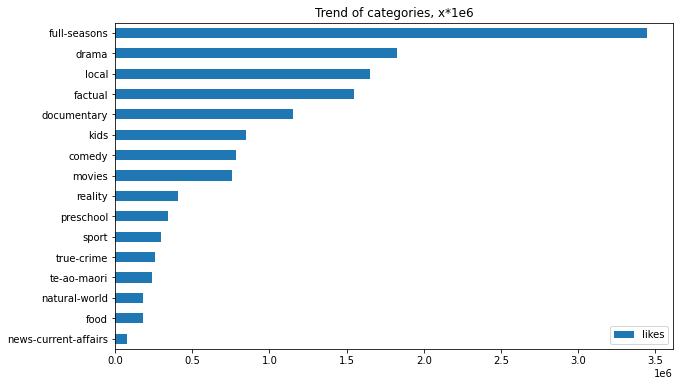

In [162]:
df_trend_likes.plot.barh(
    figsize=(10,6),
    title='Trend of categories, x*1e6'
);

Plot likes of a user id

In [164]:
categories_likes = {}
user_id = 100

tv_programs = df_user_likes.loc[user_id, df_user_likes.iloc[user_id] == 1].index
categories = df_tv_programs[df_tv_programs.tv_program_id.isin(tv_programs) & (df_tv_programs.is_season == 0)]['category']

for category in categories:
    if category in categories_likes:
        categories_likes[category] = categories_likes[category] + 1
    else:
        categories_likes[category] = 1

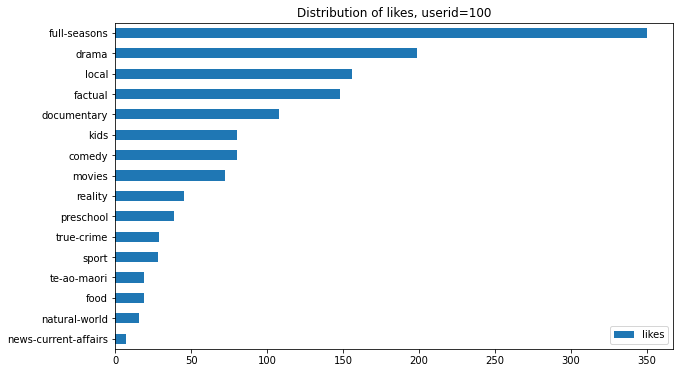

In [165]:
pd.DataFrame(categories_likes.values(), index=categories_likes.keys(), columns=['likes']).sort_values(by='likes').plot.barh(
    figsize=(10,6),
    title=f'Distribution of likes, userid={user_id}'
);

Create Cosine Similarity, higher the more similar

In [27]:
df_likes = pd.read_csv('../data/user_x_tvprogram_favorites.csv')
matrix = df_likes.to_numpy()

In [28]:
%%time

from tqdm import tqdm

to_store = []
L = matrix.shape[-1]

for item_a in tqdm(range(L)):
    item_aa = [matrix[:, item_a]]

    for item_b in range(L):
        if item_a == item_b:
            continue

        item_bb = [matrix[:, item_b]]

        cosine_sim = cosine_similarity(item_aa, item_bb)[0][0]

        to_store.append({
            'tv_show_idx': item_a,
            'tv_show_idy': item_b,
            'score': cosine_sim
        })

100%|██████████| 1336/1336 [03:29<00:00,  6.38it/s]

CPU times: user 3min 2s, sys: 26.4 s, total: 3min 29s
Wall time: 3min 29s


In [29]:
pd.DataFrame(to_store).to_csv('../data/recommendation_cosine_similarity.csv', index=False)

In [33]:
pd.read_csv('../data/recommendation_cosine_similarity.csv').head(10).sort_values(by='score', ascending=False)

,tv_show_idx,tv_show_idy,score
0,0,1,0.502082
6,0,7,0.496701
4,0,5,0.496335
1,0,2,0.495043
3,0,4,0.494031
9,0,10,0.492463
8,0,9,0.491580
2,0,3,0.491326
5,0,6,0.486817
7,0,8,0.486224


#### User log

watch time (60 - watch time = 10 T=30), favorite, click on content,

In [3]:
user_ids = pd.read_csv('../data/fake_users.csv').user_id
tv_program_ids = pd.read_csv('../data/user_x_tvprogram_favorites.csv').columns

click on content

In [92]:
%%time

generated_dates = pd.period_range(start='2021-01-01', end=pd.to_datetime('today').date(), freq='M')

data = []

recommendation_type = ['diverse', 'similar', 'random', 'hate']

for user_id in user_ids[2:]:
    proba_each_day = np.random.sample(len(generated_dates))
    for date, proba_of_day in zip(generated_dates, proba_each_day):
        sampled = np.random.randint(0, len(tv_program_ids), size=len(tv_program_ids))[:15]
        selected = list(filter(lambda x: np.random.sample(1) > 0.5, sampled))
        L = len(selected)

        if L > 0:
            rec_types_index = [np.argmax(np.random.sample(len(recommendation_type))) for _ in range(L)]
            np.random.shuffle(rec_types_index)
            rec_types_index = rec_types_index[:L]
            # rec_types_index = [np.argmax(np.random.sample(len(recommendation_type))) for _ in range(len(selected)**2)]

            watched = list(map(lambda x: 1 if np.random.sample(1) > 0.7 else 0, sampled))
            watch_time = list(map(lambda x: np.random.randint(10, 61) if x == 1 else 0, watched))

            [data.append({
                'user_id': user_id,
                'tv_program_id': selected[idx],
                'recom_type': recommendation_type[rec_types_index[idx]],
                'watched': watched[idx],
                'watch_time': watch_time[idx],
                'date': date
            }) for idx in range(L)]

CPU times: user 23.5 s, sys: 226 ms, total: 23.7 s
Wall time: 23.7 s


In [93]:
user_logs = pd.DataFrame(data)
user_logs.head()

,user_id,tv_program_id,recom_type,watched,watch_time,date
0,2,235,similar,0,0,2021-01
1,2,940,diverse,0,0,2021-01
2,2,180,diverse,0,0,2021-01
3,2,505,diverse,1,46,2021-01
4,2,1214,diverse,1,37,2021-01


In [95]:
user_logs.to_csv('../data/users_logs.csv')

Plot the peanut butter out of it

In [173]:
user_logs.set_index(keys=['date']).groupby(['user_id', 'recom_type']).agg(len)[:20]

tv_program_id  watched  watch_time
user_id recom_type                                    
2       diverse                31       31          31
        hate                   30       30          30
        random                 28       28          28
        similar                27       27          27
3       diverse                28       28          28
        hate                   27       27          27
        random                 23       23          23
        similar                22       22          22
4       diverse                22       22          22
        hate                   24       24          24
        random                 31       31          31
        similar                32       32          32
5       diverse                29       29          29
        hate                   27       27          27
        random                 33       33          33
        similar                38       38          38
6       diverse                27       27          27
        hate                   28       28          28
        random                 20       20          20
        similar                32       32          32

In [288]:
from collections import Counter
# grouped = user_logs[['date', 'recom_type']].groupby('date').aggregate(lambda x: Counter(x))
grouped = user_logs[['date', 'recom_type']].groupby(['date', 'recom_type']).agg(len)

In [289]:
grouped = grouped.reset_index().rename(columns={0:'freq'})

In [293]:
grouped

,date,recom_type,freq
0,2021-01,diverse,18629
1,2021-01,hate,18702
2,2021-01,random,18617
3,2021-01,similar,18534
4,2021-02,diverse,18839
5,2021-02,hate,18701
6,2021-02,random,18602
7,2021-02,similar,18741
8,2021-03,diverse,18832
9,2021-03,hate,18931


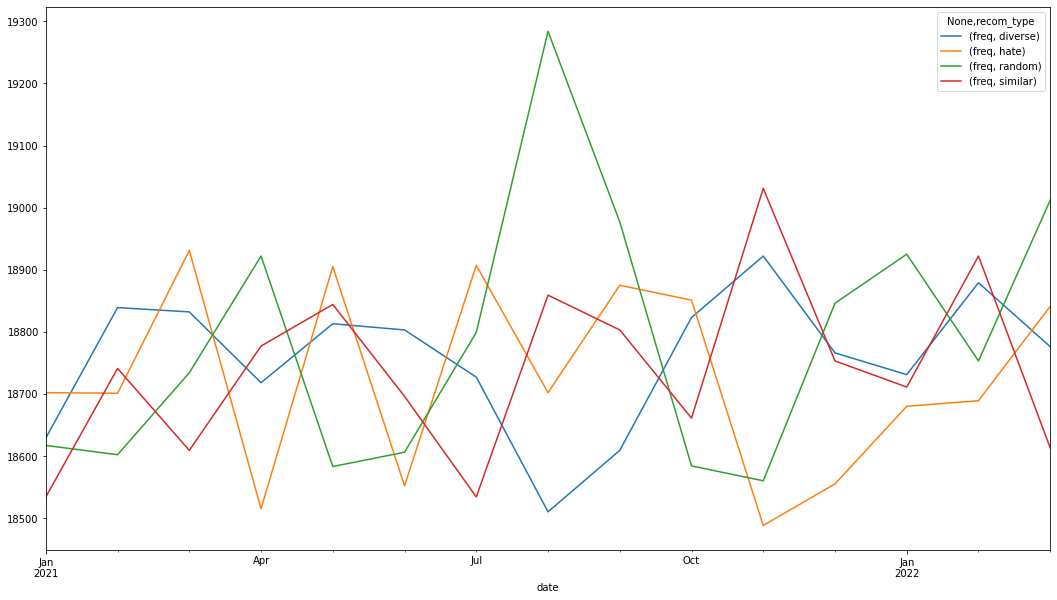

In [339]:
date_x_recom_matrix = grouped.pivot(index='date', columns='recom_type')
date_x_recom_matrix.plot(figsize=(18, 10));

In [324]:
date_x_recom_matrix

freq                      
recom_type diverse   hate random similar
date                                    
2021-01      18629  18702  18617   18534
2021-02      18839  18701  18602   18741
2021-03      18832  18931  18734   18609
2021-04      18718  18515  18922   18777
2021-05      18813  18905  18583   18844
2021-06      18803  18552  18606   18696
2021-07      18727  18907  18799   18534
2021-08      18510  18702  19284   18859
2021-09      18609  18875  18977   18803
2021-10      18823  18851  18584   18661
2021-11      18922  18488  18560   19031
2021-12      18766  18555  18846   18753
2022-01      18731  18680  18925   18711
2022-02      18879  18689  18753   18922
2022-03      18776  18841  19012   18613

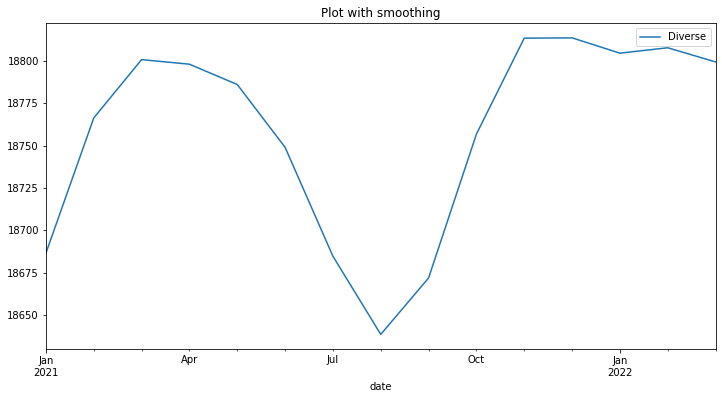

In [335]:
def smooth(x, y, smooth=0.50):
    xs = np.linspace(x[0], x[-1], len(x))
    ys = csaps(x, y, xs, smooth=smooth)
    return xs, ys

smooth_x, smooth_y = smooth(list(range(len(date_x_recom_matrix.index))), date_x_recom_matrix.iloc[:, 0].values)

pd.DataFrame({
    'Diverse': smooth_y
}, index=date_x_recom_matrix.index).plot(figsize=(12,6), title='Plot with smoothing');

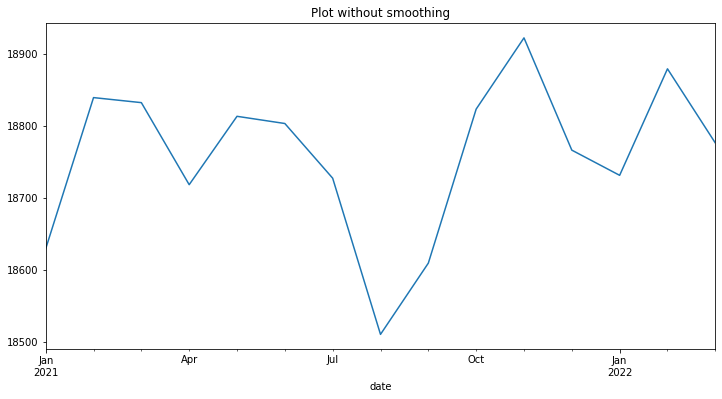

In [337]:
date_x_recom_matrix.iloc[:, 0].plot(figsize=(12,6), title='Plot without smoothing');

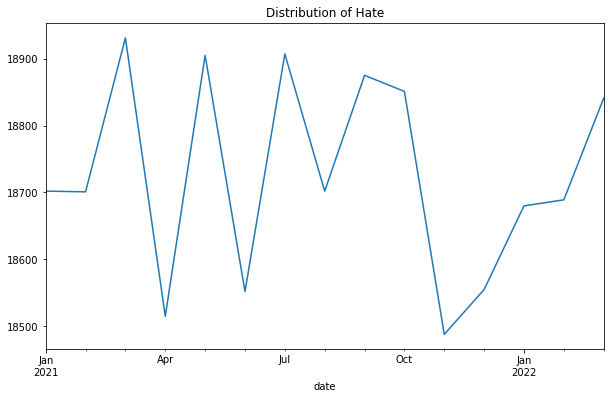

In [172]:
grouped[grouped.recom_type == 'hate'].set_index('date')['freq'].plot(figsize=(10,6), title='Distribution of Hate');

In [11]:
xx = pd.read_csv('../data/user_x_tvprogram_favorites.csv')
xx

,0,1,2,3,4,5,6,7,8,9,...,2719,2726,2728,2740,2744,2749,2754,2765,2770,2773
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,1,0,0,0,...,0,1,0,1,1,0,1,0,0,1
3,1,1,0,0,0,1,1,1,0,0,...,1,0,1,0,1,0,0,1,1,0
4,1,1,0,0,1,0,1,1,0,0,...,0,1,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,0,0,1,0,1,1,0,1,0,...,1,1,1,0,0,1,0,1,0,1
9996,1,1,1,0,1,0,1,0,1,1,...,1,1,1,1,0,0,1,0,0,0
9997,0,1,1,1,1,1,0,0,1,1,...,0,1,1,1,0,0,1,1,1,0
9998,1,1,0,1,0,0,0,0,0,1,...,1,1,1,1,1,0,0,1,0,1


In [5]:
user_logs = pd.read_csv('../data/users_logs.csv').iloc[:, 1:]
user_logs.head()

,user_id,tv_program_id,recom_type,watched,watch_time,date
0,2,235,similar,0,0,2021-01
1,2,940,diverse,0,0,2021-01
2,2,180,diverse,0,0,2021-01
3,2,505,diverse,1,46,2021-01
4,2,1214,diverse,1,37,2021-01


In [13]:
subset_clicks = user_logs[['date', 'recom_type', 'watched']]
subset_clicks = subset_clicks[subset_clicks.watched == 0]
not_watched_grouped = subset_clicks.groupby(['date', 'recom_type']).agg(len)
not_watched_grouped = not_watched_grouped.reset_index().rename(columns={0:'freq'})
not_watched_grouped

,date,recom_type,watched
0,2021-01,diverse,13071
1,2021-01,hate,13096
2,2021-01,random,13066
3,2021-01,similar,13023
4,2021-02,diverse,13210
5,2021-02,hate,13109
6,2021-02,random,12915
7,2021-02,similar,13123
8,2021-03,diverse,13312
9,2021-03,hate,13384


In [16]:
date_x_watched_matrix = not_watched_grouped.pivot(index='date', columns='recom_type')
date_x_watched_matrix.columns = ['diverse', 'hate', 'random', 'similar']

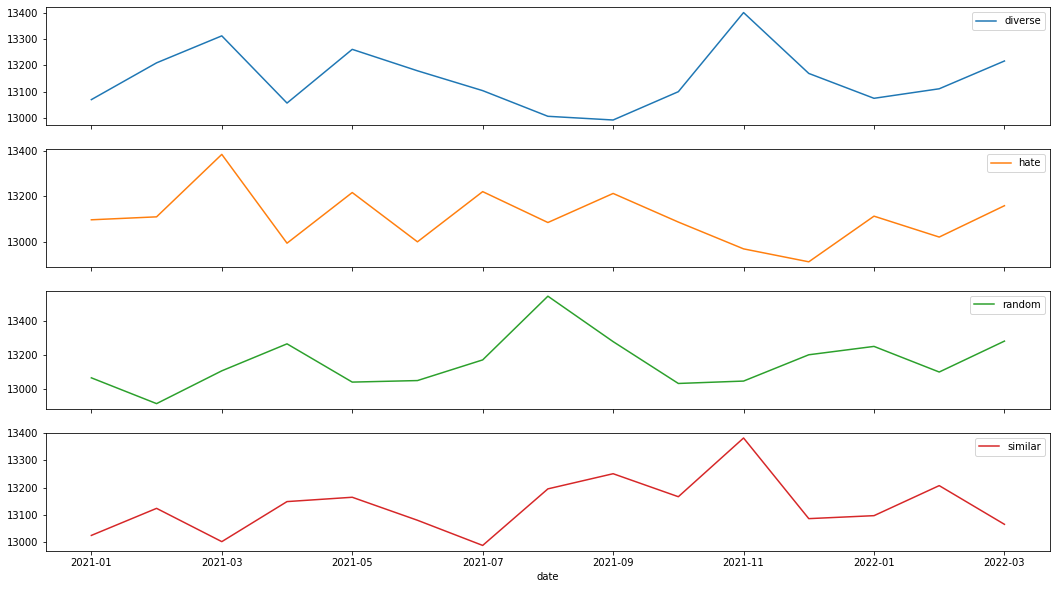

In [34]:
date_x_watched_matrix.plot(figsize=(18, 10), kind='line', subplots=True);

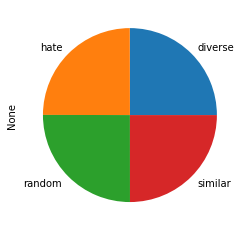

In [40]:
date_x_watched_matrix.agg(sum).plot(kind='pie');

In [41]:
user_logs

,user_id,tv_program_id,recom_type,watched,watch_time,date
0,2,235,similar,0,0,2021-01
1,2,940,diverse,0,0,2021-01
2,2,180,diverse,0,0,2021-01
3,2,505,diverse,1,46,2021-01
4,2,1214,diverse,1,37,2021-01
...,...,...,...,...,...,...
1125158,9999,474,hate,0,0,2022-03
1125159,9999,518,hate,0,0,2022-03
1125160,9999,545,hate,0,0,2022-03
1125161,9999,1021,hate,0,0,2022-03


In [52]:
subset_clicks_watch = user_logs[['date', 'recom_type', 'watched', 'watch_time']]
subset_clicks_watch = subset_clicks_watch[subset_clicks_watch.watched == 1]
subset_clicks_watch = subset_clicks_watch[['date', 'recom_type', 'watch_time']]
watched_grouped = subset_clicks_watch.groupby(['date', 'recom_type']).agg(np.mean)
watched_grouped = watched_grouped.reset_index().rename(columns={0: 'freq'})
date_x_watched_matrix = watched_grouped.pivot(index='date', columns='recom_type')
date_x_watched_matrix.columns = ['diverse', 'hate', 'random', 'similar']

In [53]:
date_x_watched_matrix

,diverse,hate,random,similar
date,,,,
2021-01,34.991544,34.845344,35.196541,34.866812
2021-02,34.842246,34.993920,35.185687,34.797437
2021-03,35.166848,34.941229,35.031455,35.289178
2021-04,35.165018,34.896958,34.910377,35.459407
2021-05,34.617435,34.818773,35.340130,35.058627
2021-06,34.698204,35.192148,35.206443,34.745594
2021-07,34.979189,35.239669,34.994136,35.010995
2021-08,34.836787,34.829121,34.851568,34.718044
2021-09,35.132502,34.968038,35.017196,35.007024


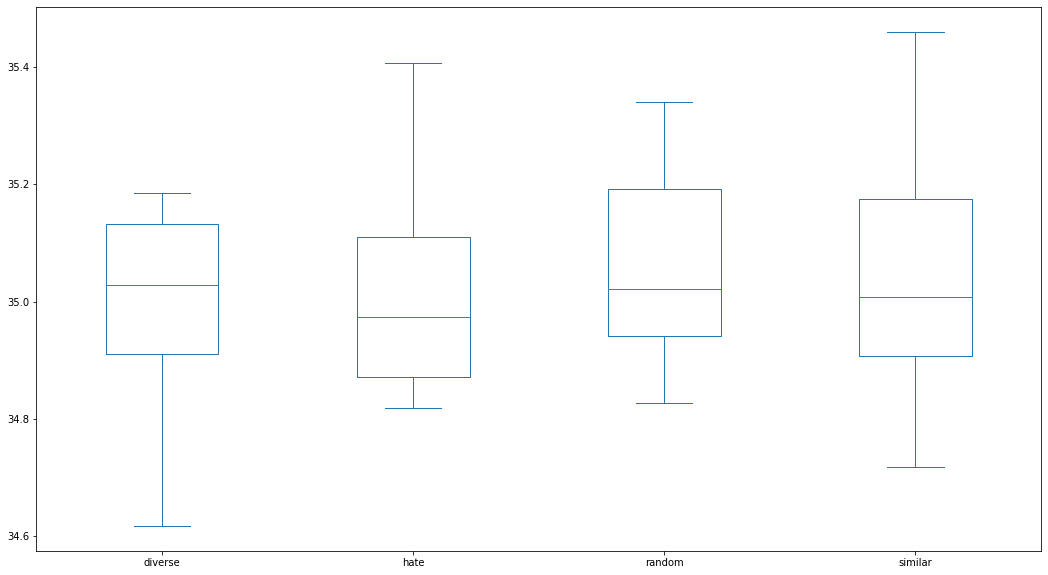

In [62]:
date_x_watched_matrix.plot(figsize=(18, 10), kind='box');